In [1]:
import os
import sys
current_directory = os.getcwd()
if not os.path.exists(current_directory + '\\experimental_data'):
    os.makedirs(current_directory + '\\experimental_data')
    os.makedirs(current_directory + '\\experimental_data\\plots')
    os.makedirs(current_directory + '\\experimental_data\\results')
sys.path.append(current_directory.replace('experiments', ''))
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.set_loglevel('WARNING')
from run import execute_simulation, create_experiment_snapshots
from mtdnetwork.mtd.completetopologyshuffle import CompleteTopologyShuffle
from mtdnetwork.mtd.ipshuffle import IPShuffle
from mtdnetwork.mtd.hosttopologyshuffle import HostTopologyShuffle
from mtdnetwork.mtd.portshuffle import PortShuffle
from mtdnetwork.mtd.osdiversity import OSDiversity
from mtdnetwork.mtd.servicediversity import ServiceDiversity
from mtdnetwork.mtd.usershuffle import UserShuffle
from mtdnetwork.mtd.osdiversityassignment import OSDiversityAssignment
import logging

# logging.basicConfig(format='%(message)s', level=logging.INFO)
logging.basicConfig(filename='simulation_metrics.log', level=logging.INFO, format='%(message)s')

In [2]:
create_experiment_snapshots([25, 50, 75, 100])

In [3]:
for i in range(1):
    evaluation = execute_simulation(start_time=0, finish_time=10000, mtd_interval=200, scheme='random', total_nodes=100)

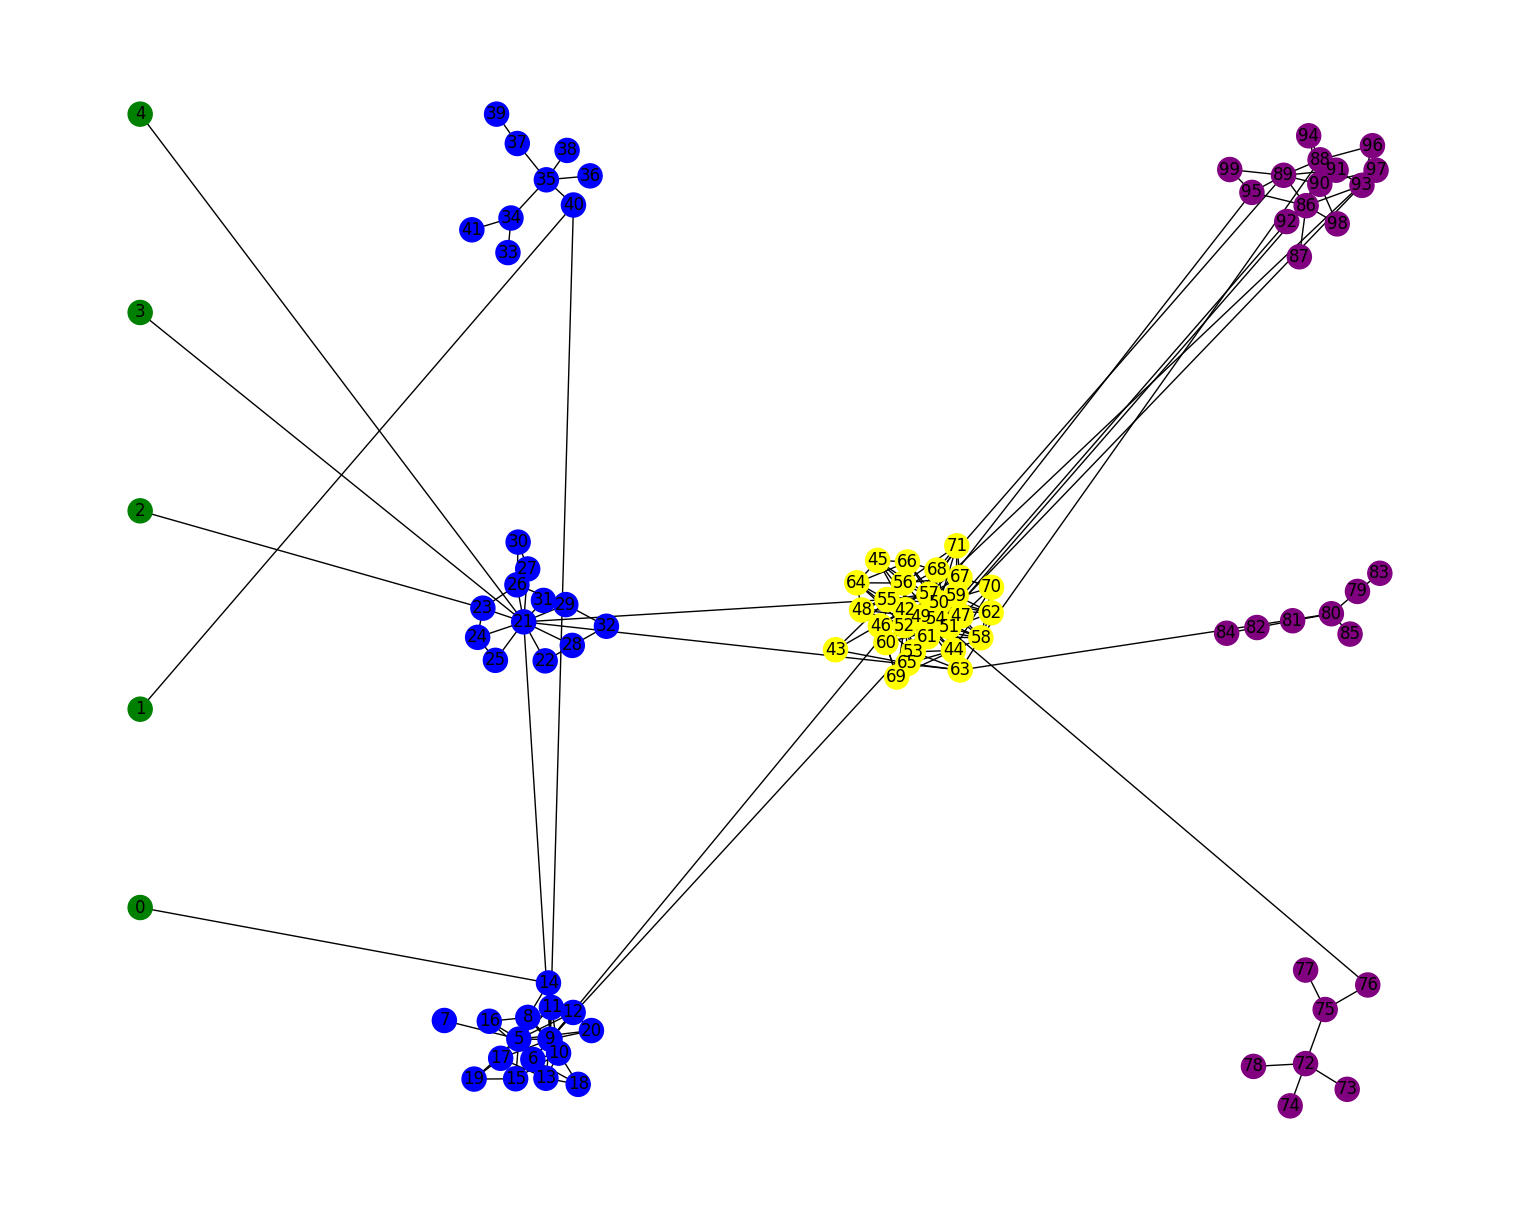

In [4]:
evaluation.get_network().draw()
plt.show()

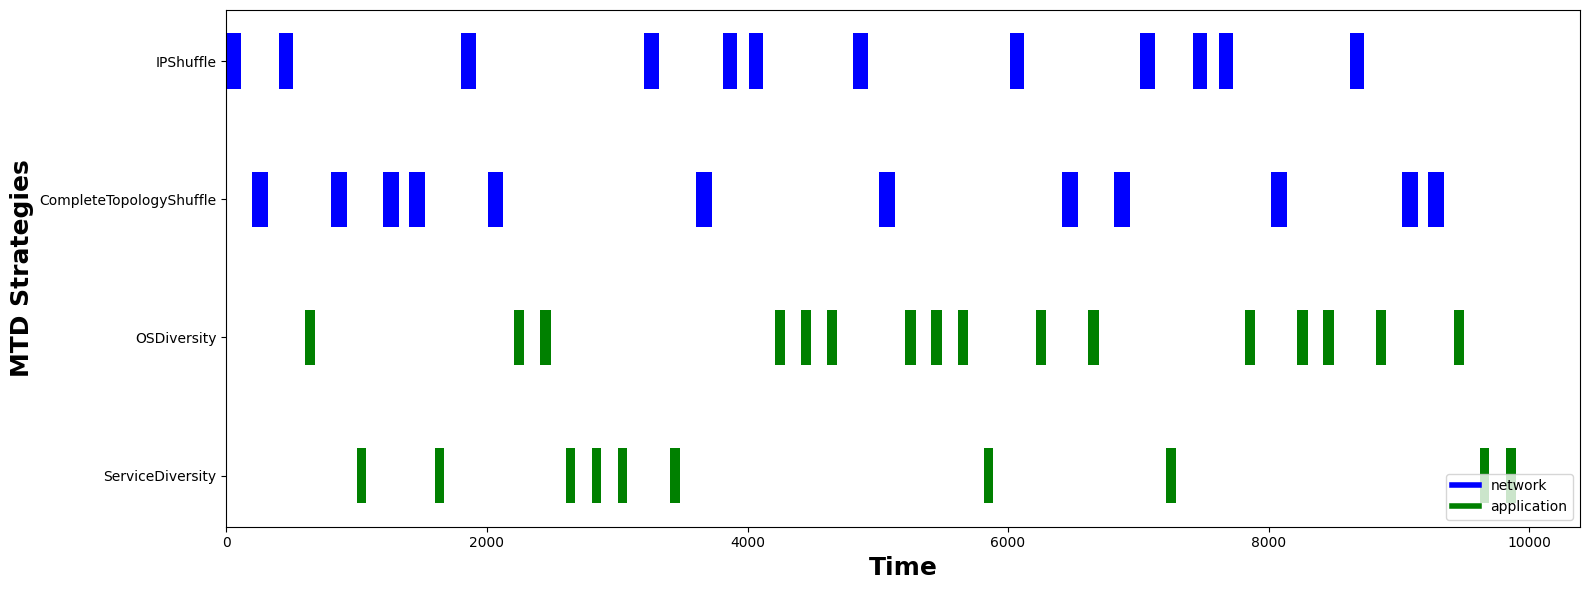

In [5]:
evaluation.visualise_mtd_operation()

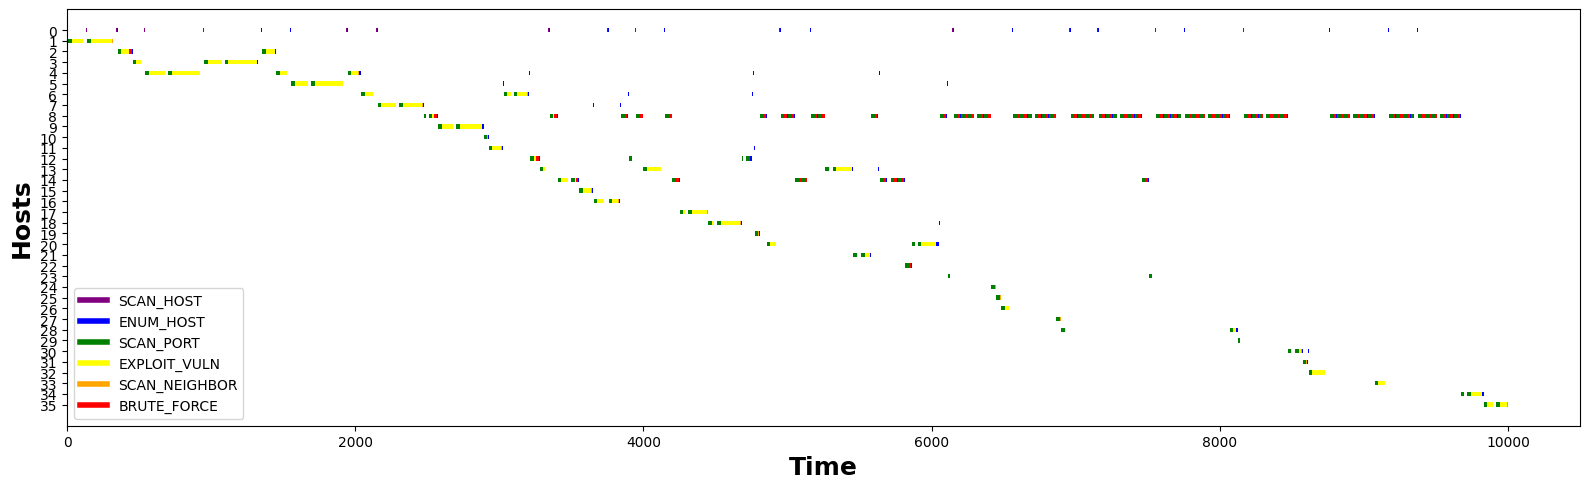

In [6]:
evaluation.visualise_attack_operation_group_by_host()

total compromised hosts:  27


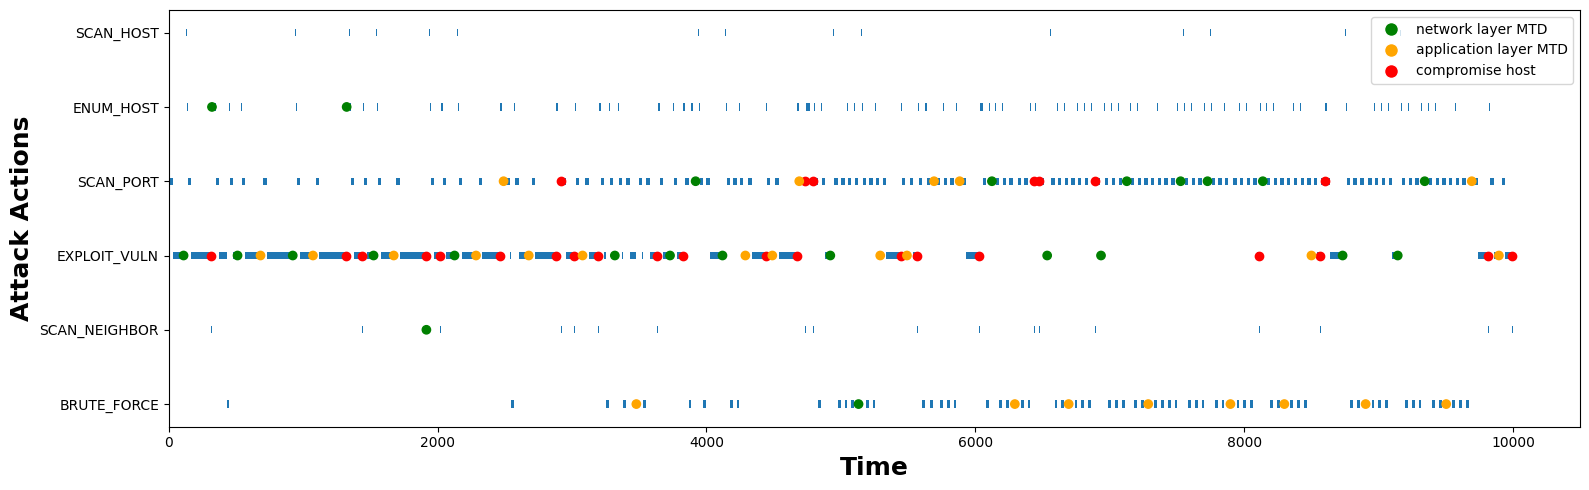

In [7]:
evaluation.visualise_attack_operation()

In [8]:
evaluation.compromise_record_by_attack_action()

,name,start_time,finish_time,duration,current_host,current_host_uuid,compromise_host,compromise_host_uuid,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_users,interrupted_in,interrupted_by,color,curr_host_token
42,EXPLOIT_VULN,310.471068,314.334013,3.862945,0,00652e7b-acb5-418e-be4f-7b81dcc10963,0,00652e7b-acb5-418e-be4f-7b81dcc10963,2,35,0,"[Laure, Midge, Colette, Viviyan, Reeta]",None,None,yellow,1
142,EXPLOIT_VULN,1312.838154,1315.628733,2.790579,12,f5347650-468f-4da0-b9a7-20b2e1fcf54d,12,f5347650-468f-4da0-b9a7-20b2e1fcf54d,2,115,1,"[Mufinella, Stephani, Minnaminnie, Tybie, Roze...",None,None,yellow,3
166,EXPLOIT_VULN,1438.868895,1440.991391,2.122496,30,a5299a75-a91b-4fbe-8695-1530002aecdd,30,a5299a75-a91b-4fbe-8695-1530002aecdd,2,134,2,"[Nisse, Ilise, Abigail, Bobbee]",None,None,yellow,2
221,EXPLOIT_VULN,1905.013416,1914.302197,9.288781,28,e9e86a0d-4808-46ff-bad4-dd648acd742d,28,e9e86a0d-4808-46ff-bad4-dd648acd742d,1,180,3,"[Joleen, Alvinia, Corella, Junia]",None,None,yellow,5
228,EXPLOIT_VULN,2015.944685,2019.666553,3.721868,23,0068cbb9-2237-44c8-b06e-42402c3f0bdc,23,0068cbb9-2237-44c8-b06e-42402c3f0bdc,3,183,4,"[Rikki, Helen-Elizabeth, Mabel]",None,None,yellow,4
279,EXPLOIT_VULN,2457.539151,2462.124024,4.584872,26,8e2c9202-2774-40be-80d8-35d79eba4e0f,26,8e2c9202-2774-40be-80d8-35d79eba4e0f,1,223,5,"[Barbabra, Manda, Kimberlee]",None,None,yellow,7
319,EXPLOIT_VULN,2872.162480,2877.420699,5.258219,31,a371165d-df9b-4618-8ccd-7f6d2a933171,31,a371165d-df9b-4618-8ccd-7f6d2a933171,1,252,6,"[Gracie, Robinett, Michel]",None,None,yellow,9
323,SCAN_PORT,2892.420699,2917.420699,25.000000,34,3b92e245-368f-4c07-94d5-a409980a54f5,34,3b92e245-368f-4c07-94d5-a409980a54f5,1,253,7,"[Katrinka, Theresita, Gratia, Alia]",None,None,green,10
336,EXPLOIT_VULN,2992.353402,3013.939178,21.585777,32,974fb5d9-d55f-4ae7-920b-304ce1e8af99,32,974fb5d9-d55f-4ae7-920b-304ce1e8af99,1,262,8,"[Susy, Tommy, Nadiya, Mala]",None,None,yellow,11
354,EXPLOIT_VULN,3172.142073,3193.652819,21.510746,24,1034bc04-f75f-4840-b242-be16f834b027,24,1034bc04-f75f-4840-b242-be16f834b027,2,274,9,[Terry],None,None,yellow,6


In [9]:
evaluation.compromise_record_by_attack_action('SCAN_PORT')

,name,start_time,finish_time,duration,current_host,current_host_uuid,compromise_host,compromise_host_uuid,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_users,interrupted_in,interrupted_by,color,curr_host_token
323,SCAN_PORT,2892.420699,2917.420699,25.0,34,3b92e245-368f-4c07-94d5-a409980a54f5,34,3b92e245-368f-4c07-94d5-a409980a54f5,1,253,7,"[Katrinka, Theresita, Gratia, Alia]",None,None,green,10
503,SCAN_PORT,4711.383901,4736.383901,25.0,33,cd48c640-6ce8-4258-a0af-387dac2a6c67,33,cd48c640-6ce8-4258-a0af-387dac2a6c67,3,358,14,"[Hinda, Fara, Cathlene, Carlyn, Jere]",None,None,green,12
511,SCAN_PORT,4771.383901,4796.383901,25.0,37,34225fec-3235-42b7-9697-784182de087e,37,34225fec-3235-42b7-9697-784182de087e,1,358,15,"[Clarabelle, Suzie, Helaina]",None,None,green,19
629,SCAN_PORT,6414.437902,6439.437902,25.0,20,981d67fc-ebc8-4a04-b4ee-ff8a83c105cf,20,981d67fc-ebc8-4a04-b4ee-ff8a83c105cf,1,390,19,[],None,None,green,24
632,SCAN_PORT,6449.437902,6474.437902,25.0,16,e809c7f2-e910-43f2-8821-5c465d22178c,16,e809c7f2-e910-43f2-8821-5c465d22178c,1,390,20,[Inga],None,None,green,25
660,SCAN_PORT,6865.173968,6890.173968,25.0,55,3cc61d42-aa0a-46d4-9d16-6bd6221dbc78,55,3cc61d42-aa0a-46d4-9d16-6bd6221dbc78,1,394,21,"[Rosemary, Josselyn]",None,None,green,27
768,SCAN_PORT,8575.161334,8600.161334,25.0,52,4a7376da-9efa-47d5-bb22-66924e31ef69,52,4a7376da-9efa-47d5-bb22-66924e31ef69,1,402,24,[Jade],None,None,green,31


In [10]:
evaluation.compromise_record_by_attack_action('EXPLOIT_VULN')

,name,start_time,finish_time,duration,current_host,current_host_uuid,compromise_host,compromise_host_uuid,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_users,interrupted_in,interrupted_by,color,curr_host_token
42,EXPLOIT_VULN,310.471068,314.334013,3.862945,0,00652e7b-acb5-418e-be4f-7b81dcc10963,0,00652e7b-acb5-418e-be4f-7b81dcc10963,2,35,0,"[Laure, Midge, Colette, Viviyan, Reeta]",None,None,yellow,1
142,EXPLOIT_VULN,1312.838154,1315.628733,2.790579,12,f5347650-468f-4da0-b9a7-20b2e1fcf54d,12,f5347650-468f-4da0-b9a7-20b2e1fcf54d,2,115,1,"[Mufinella, Stephani, Minnaminnie, Tybie, Roze...",None,None,yellow,3
166,EXPLOIT_VULN,1438.868895,1440.991391,2.122496,30,a5299a75-a91b-4fbe-8695-1530002aecdd,30,a5299a75-a91b-4fbe-8695-1530002aecdd,2,134,2,"[Nisse, Ilise, Abigail, Bobbee]",None,None,yellow,2
221,EXPLOIT_VULN,1905.013416,1914.302197,9.288781,28,e9e86a0d-4808-46ff-bad4-dd648acd742d,28,e9e86a0d-4808-46ff-bad4-dd648acd742d,1,180,3,"[Joleen, Alvinia, Corella, Junia]",None,None,yellow,5
228,EXPLOIT_VULN,2015.944685,2019.666553,3.721868,23,0068cbb9-2237-44c8-b06e-42402c3f0bdc,23,0068cbb9-2237-44c8-b06e-42402c3f0bdc,3,183,4,"[Rikki, Helen-Elizabeth, Mabel]",None,None,yellow,4
279,EXPLOIT_VULN,2457.539151,2462.124024,4.584872,26,8e2c9202-2774-40be-80d8-35d79eba4e0f,26,8e2c9202-2774-40be-80d8-35d79eba4e0f,1,223,5,"[Barbabra, Manda, Kimberlee]",None,None,yellow,7
319,EXPLOIT_VULN,2872.162480,2877.420699,5.258219,31,a371165d-df9b-4618-8ccd-7f6d2a933171,31,a371165d-df9b-4618-8ccd-7f6d2a933171,1,252,6,"[Gracie, Robinett, Michel]",None,None,yellow,9
336,EXPLOIT_VULN,2992.353402,3013.939178,21.585777,32,974fb5d9-d55f-4ae7-920b-304ce1e8af99,32,974fb5d9-d55f-4ae7-920b-304ce1e8af99,1,262,8,"[Susy, Tommy, Nadiya, Mala]",None,None,yellow,11
354,EXPLOIT_VULN,3172.142073,3193.652819,21.510746,24,1034bc04-f75f-4840-b242-be16f834b027,24,1034bc04-f75f-4840-b242-be16f834b027,2,274,9,[Terry],None,None,yellow,6
394,EXPLOIT_VULN,3626.215648,3634.555141,8.339493,25,0e2d0c2f-520e-4621-b7cb-035d5ff49b5a,25,0e2d0c2f-520e-4621-b7cb-035d5ff49b5a,1,294,10,"[Tracee, Milissent]",None,None,yellow,15


In [11]:
evaluation.compromise_record_by_attack_action('BRUTE_FORCE')

,name,start_time,finish_time,duration,current_host,current_host_uuid,compromise_host,compromise_host_uuid,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_users,interrupted_in,interrupted_by,color,curr_host_token


In [12]:
evaluation.evaluation_result_by_compromise_checkpoint()

[{'time_to_compromise': 3031.0554300091053,
  'attack_success_rate': 0.3333333333333333,
  'host_compromise_ratio': 0.1,
  'mtd_execution_frequency': 0.0050528281835915375},
 {'time_to_compromise': 5229.91138184394,
  'attack_success_rate': 0.2702702702702703,
  'host_compromise_ratio': 0.2,
  'mtd_execution_frequency': 0.0050528281835915375}]

In [13]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder

class Feature:

    def __init__(self, df) -> None:
        # Example parameter for encoding
        self.df, label_encoders = self.encode_text_to_integers(df, ["name", "executed_at", "color"])
        # self.df, scaler = self.normalize_dataframe(self.df)
        
    def normalize_dataframe(self, df, scaler_type='minmax'):
        # Select only numerical columns for normalization
        numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

        # Exclude columns that were encoded
        encoded_columns = ["name", "executed_at", "color"]
        numerical_columns = [col for col in numerical_columns if col not in encoded_columns]

        if scaler_type == 'minmax':
            scaler = MinMaxScaler()  # Create MinMaxScaler object
        elif scaler_type == 'standard':
            scaler = StandardScaler()  # Create StandardScaler object
        else:
            raise ValueError("Invalid scaler_type. Must be 'minmax' or 'standard'.")

        normalized_data = scaler.fit_transform(df[numerical_columns])  # Fit and transform numerical columns
        df[numerical_columns] = normalized_data  # Update DataFrame with normalized data
        
        return df, scaler

    def encode_text_to_integers(self, df, columns):
        encoded_df = df.copy()  # Create a copy of the DataFrame
        label_encoders = {}  # Dictionary to store LabelEncoders for each column
        
        for column in columns:
            label_encoder = LabelEncoder()  # Create a LabelEncoder for the column
            encoded_df[column] = label_encoder.fit_transform(encoded_df[column])  # Encode the column to integers
            label_encoders[column] = label_encoder  # Store the LabelEncoder
            
        return encoded_df, label_encoders


In [14]:
evaluation._mtd_record

,name,start_time,finish_time,duration,executed_at,color
0,IPShuffle,0.000000,110.067814,110.067814,network,blue
1,CompleteTopologyShuffle,200.017339,321.374352,121.357013,network,blue
2,IPShuffle,401.539342,511.573111,110.033770,network,blue
3,OSDiversity,601.854422,682.451165,80.596743,application,green
4,CompleteTopologyShuffle,802.153508,922.236943,120.083435,network,blue
5,ServiceDiversity,1002.666411,1072.728308,70.061898,application,green
6,CompleteTopologyShuffle,1202.805659,1323.340363,120.534704,network,blue
7,CompleteTopologyShuffle,1403.130031,1523.480722,120.350691,network,blue
8,ServiceDiversity,1603.319248,1673.432338,70.113090,application,green
9,IPShuffle,1804.351203,1916.517488,112.166285,network,blue


In [15]:
features = Feature(evaluation._mtd_record)

In [16]:
import seaborn as sns

In [17]:
features.df

,name,start_time,finish_time,duration,executed_at,color
0,1,0.000000,110.067814,110.067814,1,0
1,0,200.017339,321.374352,121.357013,1,0
2,1,401.539342,511.573111,110.033770,1,0
3,2,601.854422,682.451165,80.596743,0,1
4,0,802.153508,922.236943,120.083435,1,0
5,3,1002.666411,1072.728308,70.061898,0,1
6,0,1202.805659,1323.340363,120.534704,1,0
7,0,1403.130031,1523.480722,120.350691,1,0
8,3,1603.319248,1673.432338,70.113090,0,1
9,1,1804.351203,1916.517488,112.166285,1,0


In [18]:
features.df.corr()

,name,start_time,finish_time,duration,executed_at,color
name,1.000000,0.080879,0.074194,-0.972823,-0.885896,0.885896
start_time,0.080879,1.000000,0.999976,-0.109315,-0.130393,0.130393
finish_time,0.074194,0.999976,1.000000,-0.102464,-0.123779,0.123779
duration,-0.972823,-0.109315,-0.102464,1.000000,0.968024,-0.968024
executed_at,-0.885896,-0.130393,-0.123779,0.968024,1.000000,-1.000000
color,0.885896,0.130393,0.123779,-0.968024,-1.000000,1.000000


<Axes: >

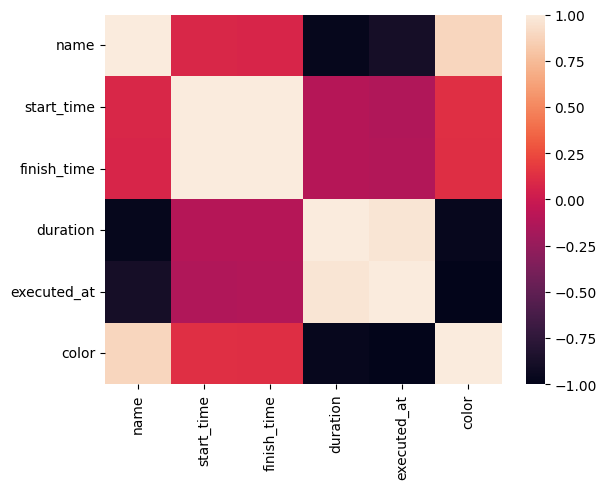

In [19]:
sns.heatmap(features.df.corr())

In [20]:
evaluation._attack_record

,name,start_time,finish_time,duration,current_host,current_host_uuid,compromise_host,compromise_host_uuid,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_users,interrupted_in,interrupted_by,color,curr_host_token
0,SCAN_HOST,0.000000,5.000000,5.000000,-1,-1,None,None,0,0,0,[],None,None,purple,0
1,ENUM_HOST,5.000000,10.000000,5.000000,-1,-1,None,None,0,0,0,[],None,None,blue,0
2,SCAN_PORT,10.000000,35.000000,25.000000,0,00652e7b-acb5-418e-be4f-7b81dcc10963,None,None,1,0,0,[],None,None,green,1
3,EXPLOIT_VULN,35.000000,35.094398,0.094398,0,00652e7b-acb5-418e-be4f-7b81dcc10963,None,None,1,0,0,[],None,None,yellow,1
4,EXPLOIT_VULN,35.094398,47.764118,12.669720,0,00652e7b-acb5-418e-be4f-7b81dcc10963,None,None,1,1,0,[],None,None,yellow,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
868,SCAN_PORT,9915.631350,9940.631350,25.000000,65,0b21643a-c574-4947-8129-8f643033ec90,None,None,1,437,26,[],None,None,green,35
869,EXPLOIT_VULN,9940.631350,9956.154802,15.523452,65,0b21643a-c574-4947-8129-8f643033ec90,None,None,1,437,26,[],None,None,yellow,35
870,EXPLOIT_VULN,9956.154802,9971.522558,15.367756,65,0b21643a-c574-4947-8129-8f643033ec90,None,None,1,438,26,[],None,None,yellow,35
871,EXPLOIT_VULN,9971.522558,9993.902835,22.380277,65,0b21643a-c574-4947-8129-8f643033ec90,65,0b21643a-c574-4947-8129-8f643033ec90,1,439,26,"[Ekaterina, Eulalie]",None,None,yellow,35


In [21]:
evaluation._attack_record[['name', 'start_time', 'finish_time', 'duration', 'compromise_host',"compromise_host_uuid"]][evaluation._attack_record['compromise_host'] != "None"]

,name,start_time,finish_time,duration,compromise_host,compromise_host_uuid
42,EXPLOIT_VULN,310.471068,314.334013,3.862945,0,00652e7b-acb5-418e-be4f-7b81dcc10963
142,EXPLOIT_VULN,1312.838154,1315.628733,2.790579,12,f5347650-468f-4da0-b9a7-20b2e1fcf54d
166,EXPLOIT_VULN,1438.868895,1440.991391,2.122496,30,a5299a75-a91b-4fbe-8695-1530002aecdd
221,EXPLOIT_VULN,1905.013416,1914.302197,9.288781,28,e9e86a0d-4808-46ff-bad4-dd648acd742d
228,EXPLOIT_VULN,2015.944685,2019.666553,3.721868,23,0068cbb9-2237-44c8-b06e-42402c3f0bdc
279,EXPLOIT_VULN,2457.539151,2462.124024,4.584872,26,8e2c9202-2774-40be-80d8-35d79eba4e0f
319,EXPLOIT_VULN,2872.162480,2877.420699,5.258219,31,a371165d-df9b-4618-8ccd-7f6d2a933171
323,SCAN_PORT,2892.420699,2917.420699,25.000000,34,3b92e245-368f-4c07-94d5-a409980a54f5
336,EXPLOIT_VULN,2992.353402,3013.939178,21.585777,32,974fb5d9-d55f-4ae7-920b-304ce1e8af99
354,EXPLOIT_VULN,3172.142073,3193.652819,21.510746,24,1034bc04-f75f-4840-b242-be16f834b027


In [22]:
evaluation._attack_record.columns

Index(['name', 'start_time', 'finish_time', 'duration', 'current_host',
       'current_host_uuid', 'compromise_host', 'compromise_host_uuid',
       'current_host_attempt', 'cumulative_attempts',
       'cumulative_compromised_hosts', 'compromise_users', 'interrupted_in',
       'interrupted_by', 'color', 'curr_host_token'],
      dtype='object')